In [125]:
from PIL import Image, ImageOps
import numpy as np
import math
import matplotlib.pyplot as plt

None
(237, 270)
L


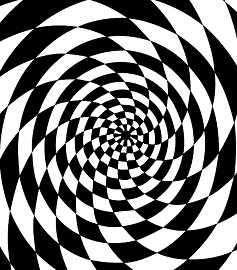

In [2]:
image = Image.open('op-art-black-and-white-infinity-whirl-tom-hill.jpg')
image = ImageOps.grayscale(image)
print(image.format)
print(image.size)
print(image.mode)
# show the image
data = np.asarray(image)
image

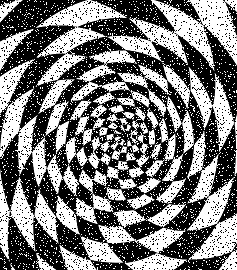

In [131]:
# Constantes

tau = 1
alpha = 0
beta = 0.3

def bruiteur(image, proba):
  image_array = data.astype('int16')
  image_array = image_array
  for i in range(np.shape(image_array)[0]):
    for j in range(np.shape(image_array)[1]):
      a = np.random.choice([-1, 1], None, p=[proba, 1-proba])
      if a < 0:
        image_array[i][j] = 255 - image_array[i][j]
  return image_array
bruit_test = bruiteur(image, 0.1) # Bruitage par inversion de 10 % des pixels
from matplotlib import cm
PIL_image = Image.fromarray(np.uint8(bruit_test)).convert('L')
PIL_image

In [132]:
print(bruit_test)
bruit_test_norm = 2*(bruit_test/255)-1 # yi € {-1 ; 1} (image bruitée, 1 = noir -1 = blanc), xi € {-1 ; 1} (image restaurée, 1 = noir -1 = blanc)

[[  0   1   1 ... 255 255 255]
 [  1   3 255 ... 255 255 255]
 [  0   0   3 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


In [140]:
# Sampler de Gibbs (tau, alpha, beta connus)
# https://towardsdatascience.com/image-denoising-with-gibbs-sampling-mcmc-concepts-and-code-implementation-11d42a90e153

def debruiteur(img_bruitee, samples, alpha, beta, tau):
  probas = np.zeros(bruit_test_norm.shape)
  img_random = 2*np.random.randint(2, size=(270, 237))-1
  for step in range(samples):
          for i in range(1, img_random.shape[0]-1):
              for j in range(1, img_random.shape[1]-1):
                  y = sample_y(i, j, img_random, img_bruitee, alpha, beta, tau)
                  img_random[i, j] = y
                  if y == 1:
                      probas[i, j] += 1
  probas = probas / samples
  return probas

def sample_y(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1
  
probas = debruiteur(bruit_test_norm, 20, alpha, beta, tau)

In [141]:
probas_copy = probas[:]

In [142]:
probas_copy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.9 , 0.25, ..., 0.1 , 0.1 , 0.  ],
       [0.  , 0.95, 0.85, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.95, ..., 0.1 , 0.05, 0.  ],
       [0.  , 0.9 , 0.9 , ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

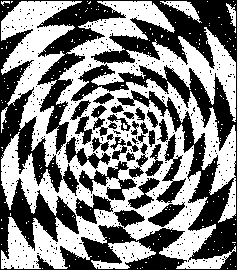

In [143]:
probas_copy[probas_copy > 0.5] = 255
probas_copy[probas_copy <= 0.5] = 0
PIL_image2 = Image.fromarray(np.uint8(probas_copy)).convert('L')
PIL_image2

tau estimé : 1.4753436812279337


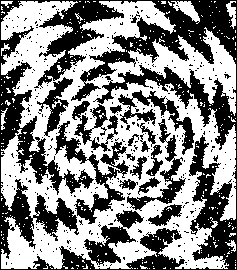

tau estimé : 1.4493762614425107


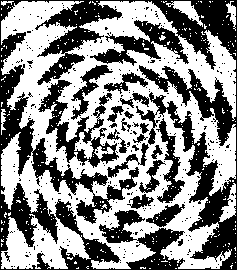

tau estimé : 1.424634215347498


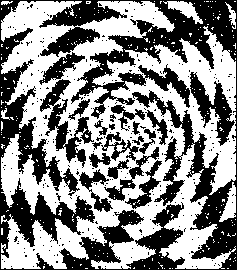

tau estimé : 1.401268992017743


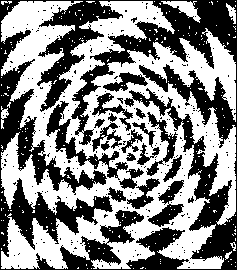

tau estimé : 1.3792858027655974


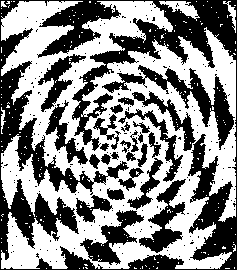

tau estimé : 1.357113366229051


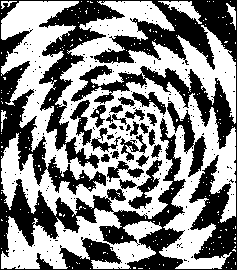

tau estimé : 1.3360840237777012


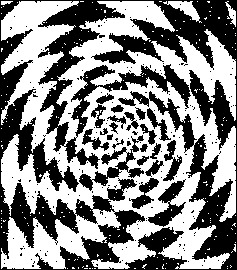

tau estimé : 1.3157548614810215


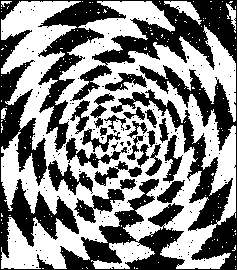

tau estimé : 1.296089431188365


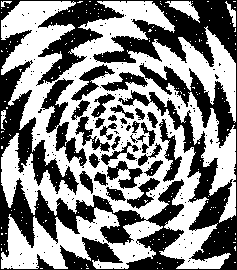

tau estimé : 1.277430810204898


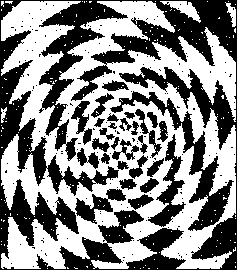

tau estimé : 1.2621929856298282


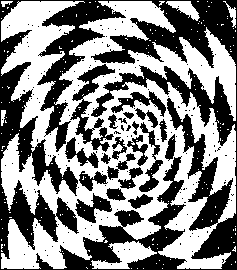

tau estimé : 1.2463701107682714


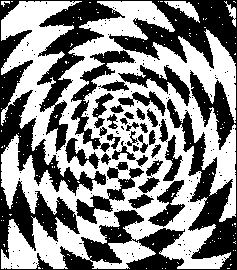

tau estimé : 1.2316081571096464


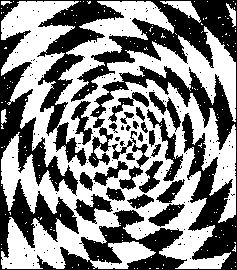

tau estimé : 1.2189716533091062


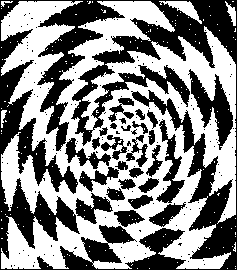

tau estimé : 1.206461624697608


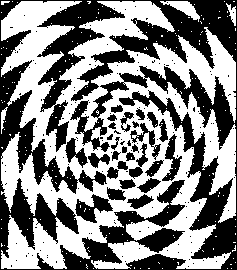

tau estimé : 1.194278139430661


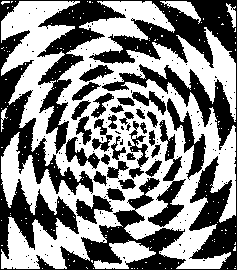

tau estimé : 1.1830367340905126


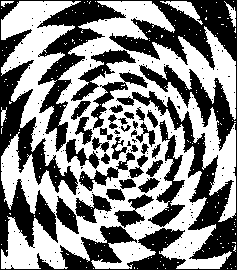

tau estimé : 1.1753525174869492


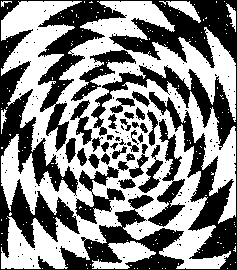

tau estimé : 1.1673057553789319


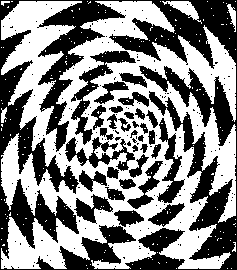

tau estimé : 1.161222049770201


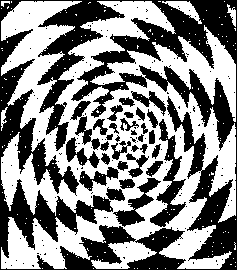

tau estimé : 1.1563150465442218


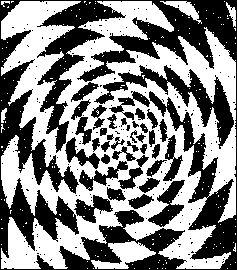

tau estimé : 1.1515084671102453


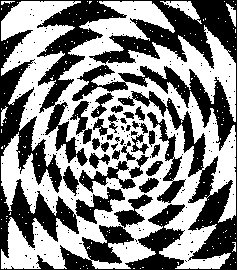

tau estimé : 1.1476810169324483


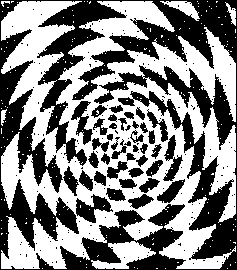

tau estimé : 1.1438244743587094


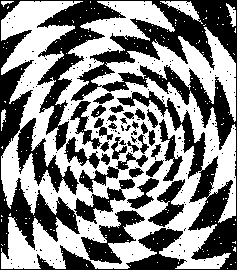

tau estimé : 1.1399160737388416


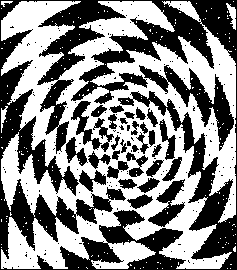

tau estimé : 1.1366616810322638


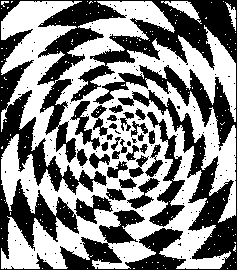

tau estimé : 1.135534666807532


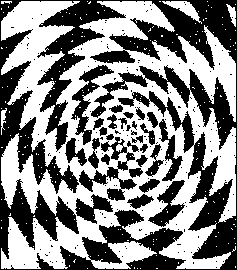

tau estimé : 1.133679338933606


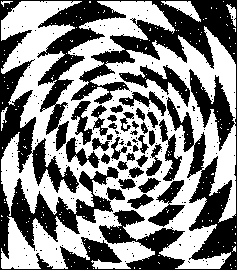

tau estimé : 1.1319352533681426


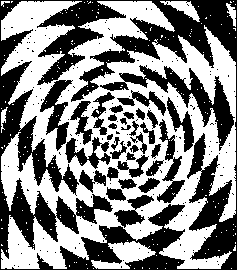

tau estimé : 1.1307392021402016


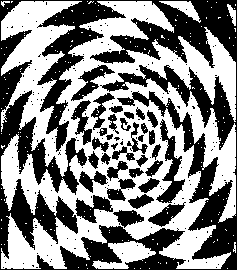

tau estimé : 1.1293364602455698


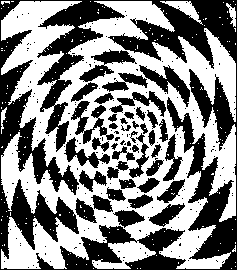

tau estimé : 1.1292966161023512


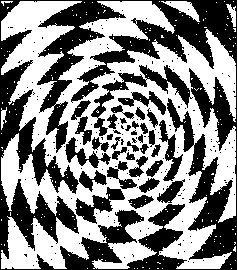

tau estimé : 1.129006099355589


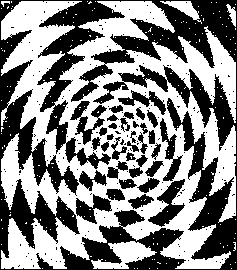

tau estimé : 1.1280258619476202


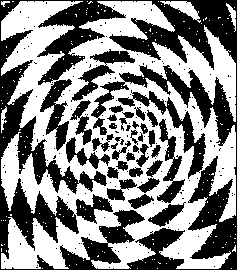

tau estimé : 1.1282026745822444


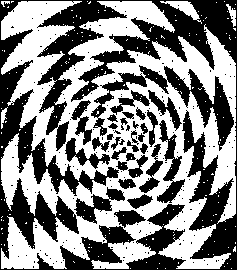

tau estimé : 1.1272806578675212


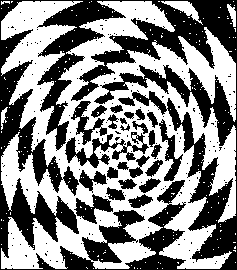

tau estimé : 1.1268027313486682


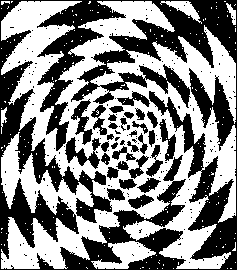

tau estimé : 1.1268742249837551


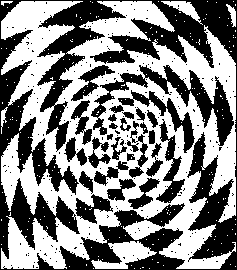

tau estimé : 1.127176750354991


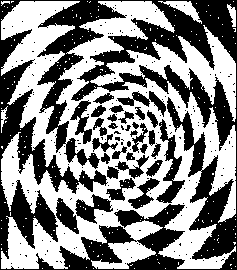

tau estimé : 1.1278643036560483


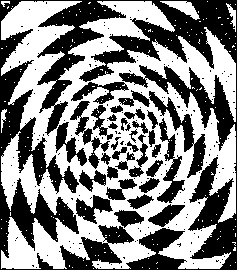

tau estimé : 1.1273594813182262


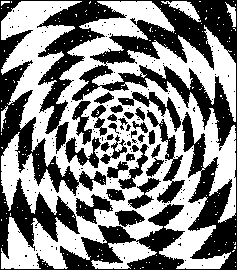

tau estimé : 1.1255816743157023


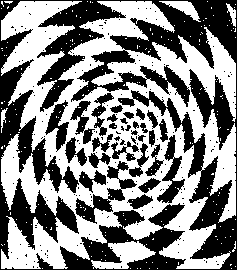

tau estimé : 1.124988452006091


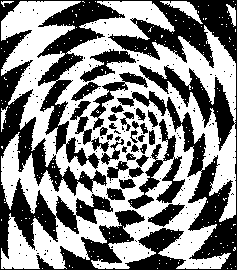

tau estimé : 1.125224287456213


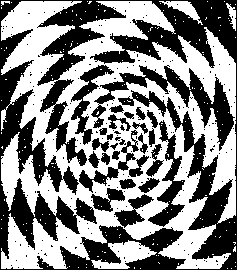

tau estimé : 1.1253866737365537


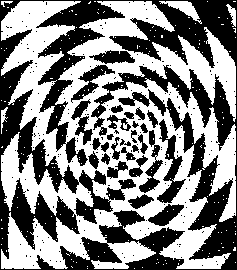

tau estimé : 1.1250255481916833


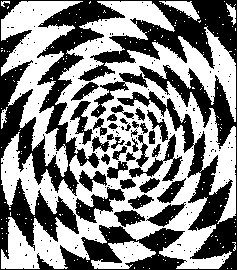

tau estimé : 1.1249153074556306


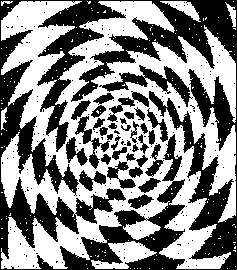

tau estimé : 1.1251522675696053


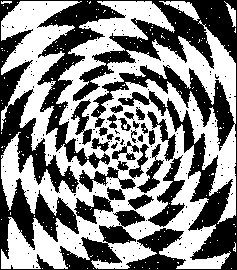

KeyboardInterrupt: ignored

In [153]:
#Q2, a priori inverse-gamma

import math

alpha_ising = 0
beta_ising = 0.3
gamma_inv = 3
rho_inv = 0.5

def sample_y_Q2(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1

def metropolis_hastings(target_density, a, b, tau_precedent, size=1):
    burnin_size = 0
    size += burnin_size
    x0 = tau_precedent
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.random.normal(xt, 0.2)
        accept_prob = min((target_density(xt_candidate))/(target_density(xt)), 1)
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
    return samples[0]

def debruiteur_Q2(img_bruitee, alpha_ising, beta_ising, gamma_inv, rho_inv, nbre_tirages):
  img_random = 2*np.random.randint(2, size=(270, 237))-1
  a,b = img_random.shape
  sim_tau = [1.5*np.ones((270, 237)) for i in range(nbre_tirages)]
  somme_voisins = 0
  samplez = 20
  probas = np.zeros((270, 237))
  for step in range(1, nbre_tirages):
    mean_step=np.mean(sim_tau[step-1])
    for s in range(samplez):
      for k in range(1, img_random.shape[0]-1):
        for l in range(1, img_random.shape[1]-1):
          y = sample_y_Q2(k, l, img_random, img_bruitee, alpha_ising, beta_ising, mean_step)
          img_random[k, l] = y
          if y == 1:
            probas[k,l] += 1
          markov_blanket = [img_random[k - 1, l], img_random[k, l - 1], img_random[k, l + 1], img_random[k + 1, l], img_bruitee[k, l]]
          somme_voisins = 0
          for g in range(len(markov_blanket)):
            if (img_random[k,l] == markov_blanket[g]):
              somme_voisins+=1
          fct_actuelle = lambda tau: 1/(tau**(gamma_inv+1))*math.exp(-1/(2*tau**2)*((img_random[k,l] - img_bruitee[k,l])**2) + beta_ising*somme_voisins - rho_inv/tau)
          sim_tau[step][k, l] = metropolis_hastings(fct_actuelle, a, b, sim_tau[step-1][k, l], size=1)
    img_random = 2*(probas/samplez >= 0.5) - 1 # Matrice des y déterminés par Gibbs
    probas = np.zeros((270, 237)) # Reset de la matrice probas (sinon l'image disparaît petit à petit)
    sim_tau[step] = np.mean(sim_tau[step])*np.ones((270,237))
    print("tau estimé :", np.mean(sim_tau[step]))
    img_random[img_random == 1] = 255
    img_random[img_random == -1] = 0
    PIL_image2 = Image.fromarray(np.uint8(img_random)).convert('L')
    display(PIL_image2)
    img_random = 2*np.random.randint(2, size=(270,237)) - 1
  return sim_tau

debruiteur_Q2(bruit_test_norm, alpha_ising, beta_ising, gamma_inv, rho_inv, 100)

In [ ]:
#Q2, a priori inverse-gamma (CODE DYSFONCTIONNEL)

alpha_ising = 0
beta_ising = 0.3
gamma_inv = 0.1
rho_inv = 0.1

def sample_y_Q2(i, j, Y, X, alpha, beta, tau): #échantillon de P(x[i,j] | V(x[i,j])) (V[x[i,j]] contient les pixels adjacents à x[i,j], et contient y[i,j])
    markov_blanket = [Y[i - 1, j], Y[i, j - 1], Y[i, j + 1], Y[i + 1, j], X[i, j]]
    w = ((markov_blanket[-1]-1)**2)/(2*tau**2) - alpha + beta * sum(markov_blanket)
    w2 = ((markov_blanket[-1]+1)**2)/(2*tau**2) + alpha - beta * sum(markov_blanket)
    prob = np.exp(w)/(np.exp(w2) + np.exp(w))
    return (np.random.rand() < prob) * 2 - 1

def metropolis_hastings(target_density, a, b, tau_precedent, size=1):
    burnin_size = 0
    size += burnin_size
    x0 = tau_precedent
    xt = x0
    samples = []
    for i in range(size):
        xt_candidate = np.random.normal(xt, 0.1)
        accept_prob = (target_density(xt_candidate))/(target_density(xt))
        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate
        samples.append(xt)
        print()
    return samples[0]

def debruiteur_Q2(img_bruitee, alpha_ising, beta_ising, gamma_inv, rho_inv, nbre_tirages):
  img_random = 2*np.random.randint(2, size=(270, 237))-1
  somme_img = np.sum(img_bruitee)
  a,b = img_random.shape
  sim_tau = [1 for i in range(nbre_tirages)]
  somme_voisins = 0
  def pdf(img_generee, img_bruitee, alpha_ising, beta_ising, gamma_inv, rho_inv, tau_actuel, step, somme_img, somme_voisins):
    pow = tau_actuel**(270*237+gamma_inv+1)
    inv_tau_sq = 1/(2*tau_actuel**2)
    print(tau_actuel)
    print(np.sum(np.square(img_generee-img_bruitee)))
    return (1/pow)*np.exp(-inv_tau_sq*np.sum(np.square(img_generee-img_bruitee)) + alpha_ising*somme_img + beta_ising*somme_voisins - rho_inv/tau_actuel)
  def pdf_appliquee(tau_actuel):
    return pdf(img_random, img_bruitee, alpha_ising, beta_ising, gamma_inv, rho_inv, tau_actuel, step, somme_img, somme_voisins)
  for step in range(1, nbre_tirages):
    for i in range(1, img_random.shape[0]-1):
      for j in range(1, img_random.shape[1]-1):
        y = sample_y_Q2(i, j, img_random, img_bruitee, alpha_ising, beta_ising, sim_tau[step-1])
        img_random[i, j] = y
        markov_blanket = [img_random[i - 1, j], img_random[i, j - 1], img_random[i, j + 1], img_random[i + 1, j], img_bruitee[i, j]]
        somme_voisins = 0
        for g in range(len(markov_blanket)):
          if (img_random[i,j] == markov_blanket[g]):
            somme_voisins+=1
    sim_tau[step] = metropolis_hastings(pdf_appliquee, a, b, sim_tau[step-1], size=1)
  return sim_tau

debruiteur_Q2(bruit_test_norm, alpha_ising, beta_ising, gamma_inv, rho_inv, 100)